In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from data_cleaning import df_cleaned

In [ ]:
from visualization import cargar_datos_limpios

conn, cursor = cargar_datos_limpios()

# Consulta SQL para seleccionar los datos
query = "SELECT * FROM us_accidents"

# Leer los datos en un DataFrame de pandas
df = pd.read_sql_query(query, conn)

In [38]:
import pandas as pd

# Cargar el DataFrame limpio desde el archivo CSV
df_cleaned = pd.read_csv('C:/Users/USUARIO/Documents/Proyecto1_ETL/data/us_accidents_cleaned.csv')

# Configurar pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


# Mostrar las primeras 20 filas en formato tabular
df_cleaned.head(20)


Conexion exitosa a la base de datos


c:\Users\USUARIO\Documents\Proyecto1_ETL\src\data_cleaning.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


          id   source  severity          start_time            end_time  \
0  A-2047758  Source2       2.0 2019-06-12 10:10:56 2019-06-12 10:55:58   
1  A-4694324  Source1       2.0 2022-12-03 23:37:14 2022-12-04 01:56:53   
2  A-5006183  Source1       2.0 2022-08-20 13:13:00 2022-08-20 15:22:45   
3  A-4237356  Source1       2.0 2022-02-21 17:43:04 2022-02-21 19:43:23   
4  A-6690583  Source1       2.0 2020-12-04 01:46:00 2020-12-04 04:13:09   

   start_lat   start_lng    end_lat     end_lng  distance_mi  \
0  30.641211  -91.153481        NaN         NaN        0.000   
1  38.990562  -77.399070  38.990037  -77.398282        0.056   
2  34.661189 -120.492822  34.661189 -120.492442        0.022   
3  43.680592  -92.993317  43.680574  -92.972223        1.054   
4  35.395484 -118.985176  35.395476 -118.985995        0.046   

                                         description            street  \
0  Accident on LA-19 Baker-Zachary Hwy at Lower Z...        Highway 19   
1  Incident on F

c:\Users\USUARIO\Documents\Proyecto1_ETL\src\data_cleaning.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
c:\Users\USUARIO\Documents\Proyecto1_ETL\src\data_cleaning.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['temperature_f'].fillna(df_cleaned['temperature_f'].mean(), inplace=True)
c:\Users\USUARIO\Documents\Pro

                   NaN Count  Empty String Count  Total Missing
severity                   0                   0              0
start_time                 0                   0              0
end_time                   0                   0              0
start_lat                  0                   0              0
start_lng                  0                   0              0
distance_mi                0                   0              0
street                     0                   0              0
city                       0                   0              0
county                     0                   0              0
state                      0                   0              0
zipcode                    0                   0              0
timezone                   0                   0              0
airport_code               0                   0              0
weather_timestamp          0                   0              0
temperature_f              0            

OSError: Cannot save file into a non-existent directory: 'data'

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_32356\48438225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='severity', palette='viridis')


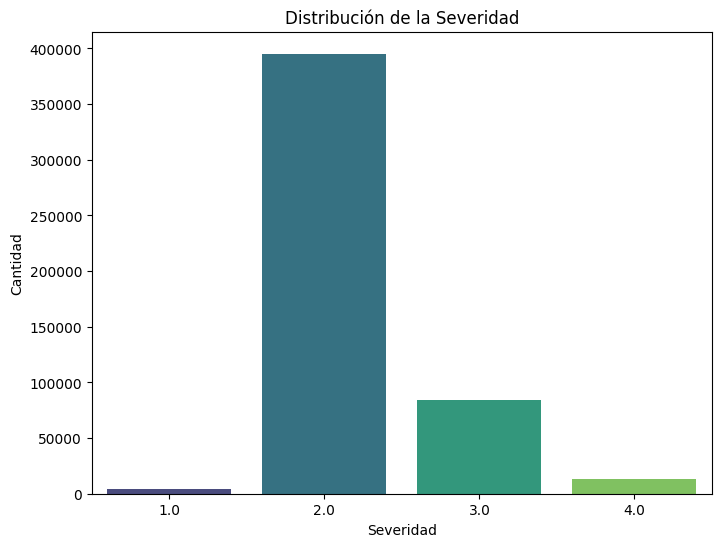

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de la variable 'severity'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='severity', palette='viridis')
plt.title('Distribución de la Severidad')
plt.xlabel('Severidad')
plt.ylabel('Cantidad')
plt.show()

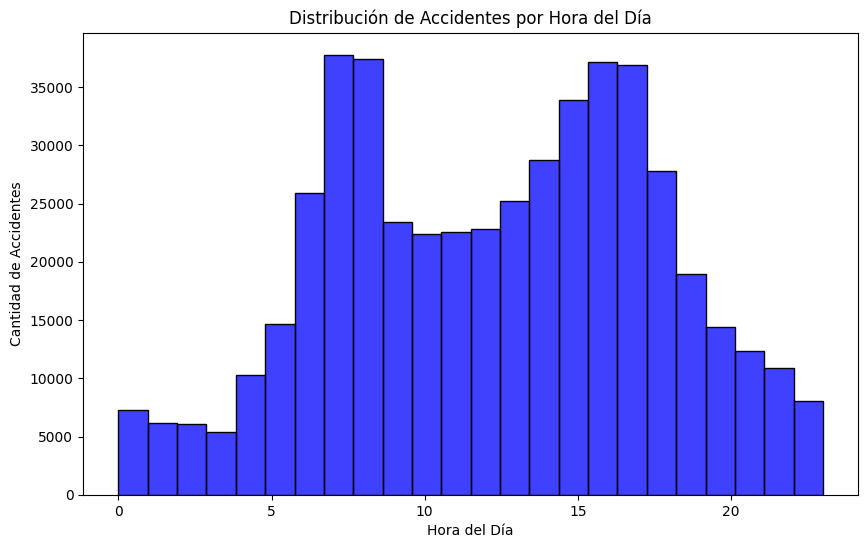

In [13]:
# 2. Distribución de la variable 'start_time'
df_cleaned['start_time'] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned['hour'] = df_cleaned['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['hour'], bins=24, kde=False, color='blue')
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_32356\2291847045.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts, y=weather_counts.index, palette='Spectral')


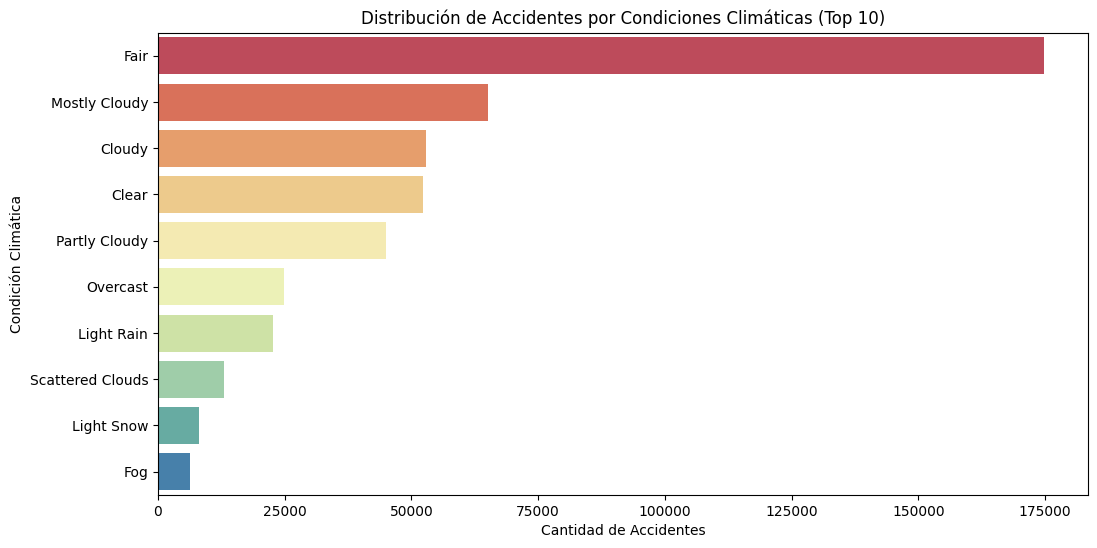

In [17]:
# 5. Distribución de accidentes por condiciones climáticas
plt.figure(figsize=(12, 6))
weather_counts = df_cleaned['weather_condition'].value_counts().nlargest(10)
sns.barplot(x=weather_counts, y=weather_counts.index, palette='Spectral')
plt.title('Distribución de Accidentes por Condiciones Climáticas (Top 10)')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Condición Climática')
plt.show()

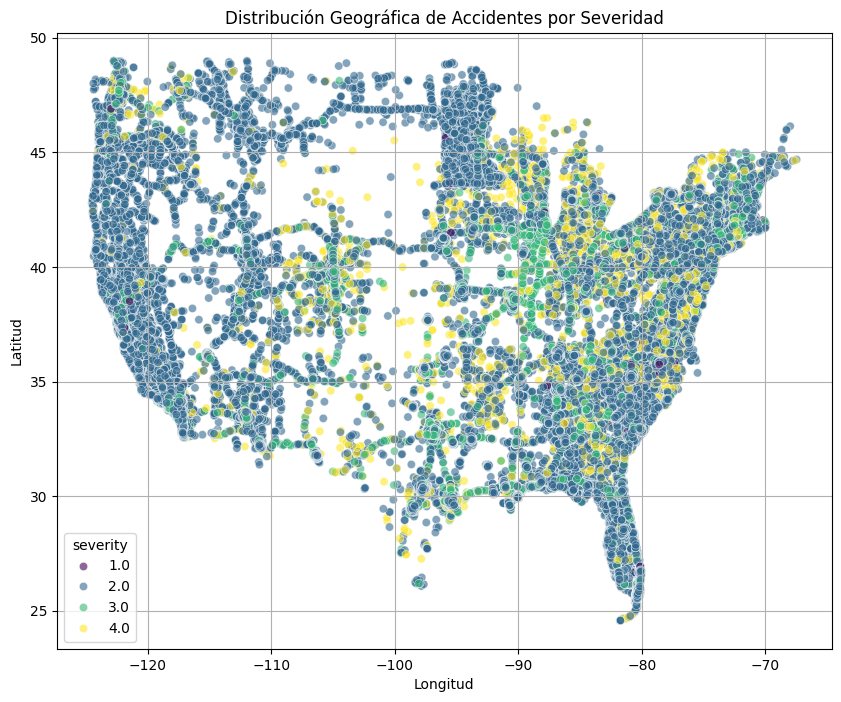

In [22]:
# 10. Distribución geográfica de accidentes (latitud vs longitud)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_cleaned, x='start_lng', y='start_lat', hue='severity', palette='viridis', alpha=0.6)
plt.title('Distribución Geográfica de Accidentes por Severidad')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_32356\3915856367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='sunrise_sunset', palette='viridis')


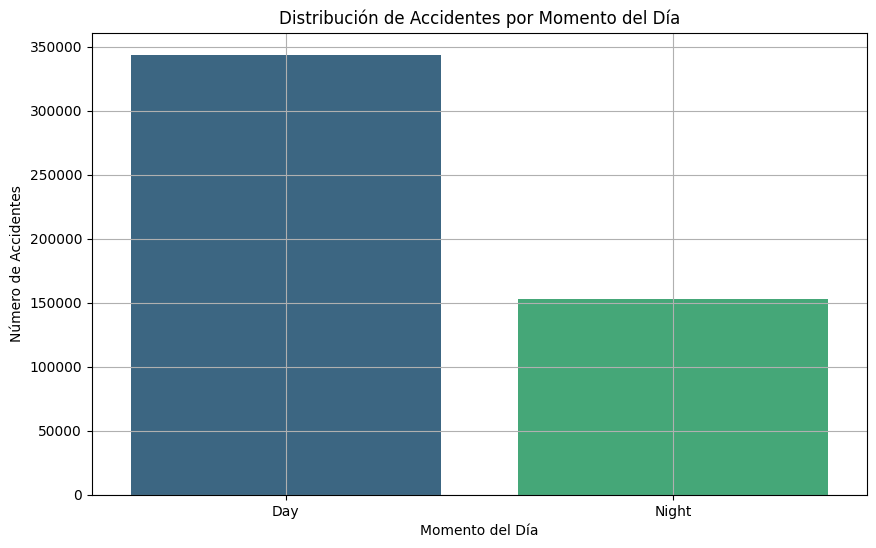

In [24]:
# Crear el gráfico de distribución de accidentes por momento del día
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='sunrise_sunset', palette='viridis')
plt.title('Distribución de Accidentes por Momento del Día')
plt.xlabel('Momento del Día')
plt.ylabel('Número de Accidentes')
plt.grid(True)
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_32356\3331350330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streets.index, y=top_streets.values, palette='viridis')


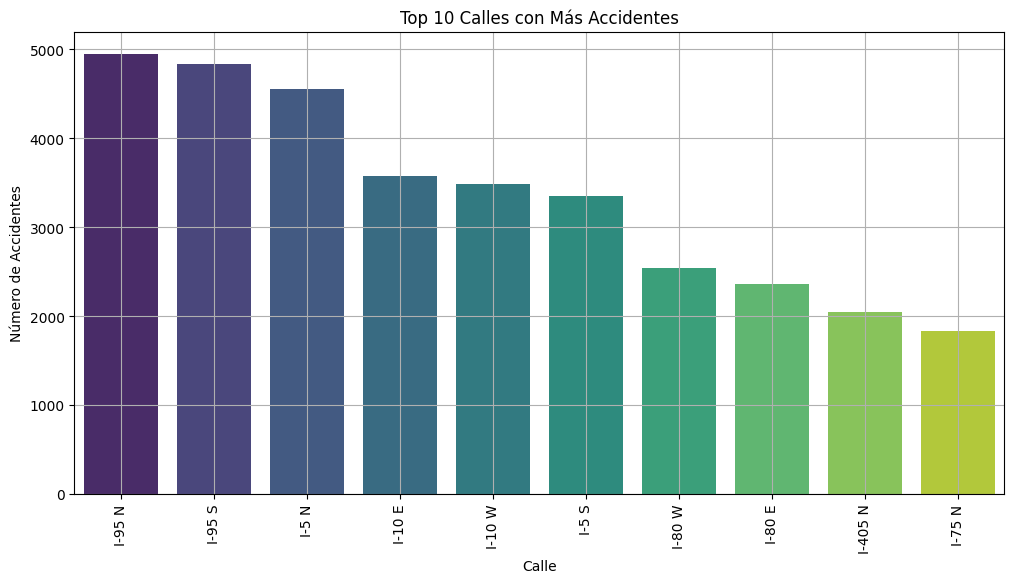

In [26]:
# Obtener el top 10 de calles con más accidentes
top_streets = df_cleaned['street'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_streets.index, y=top_streets.values, palette='viridis')
plt.title('Top 10 Calles con Más Accidentes')
plt.xlabel('Calle')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


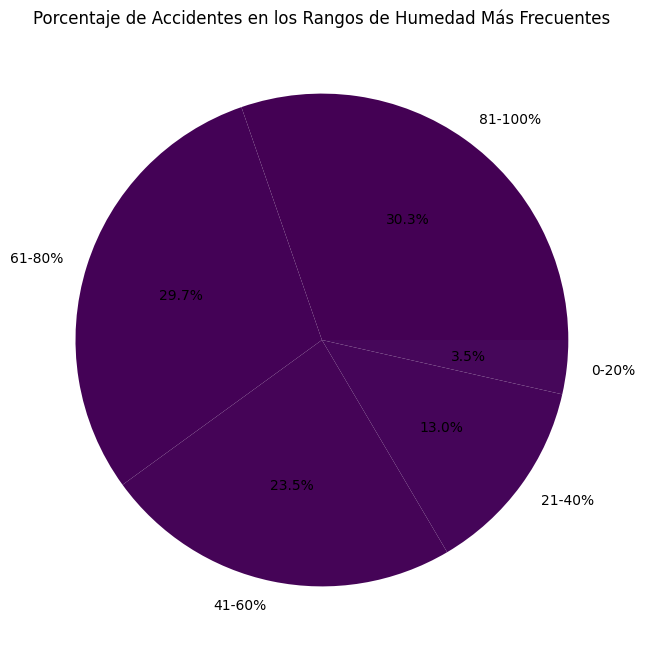

In [30]:
# Definir los rangos de humedad
humidity_bins = [0, 20, 40, 60, 80, 100]  # Puedes ajustar estos rangos según los datos
humidity_labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# Crear una nueva columna para los rangos de humedad
df_cleaned['humidity_range'] = pd.cut(df_cleaned['humidity_percent'], bins=humidity_bins, labels=humidity_labels, include_lowest=True)

# Obtener las 10 categorías de humedad más frecuentes
top_humidity_ranges = df_cleaned['humidity_range'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(10, 8))
plt.pie(top_humidity_ranges, labels=top_humidity_ranges.index, autopct='%1.1f%%', colors=plt.cm.viridis(range(len(top_humidity_ranges))))
plt.title('Porcentaje de Accidentes en los Rangos de Humedad Más Frecuentes')
plt.show()
